# **IBM Data Analyst Capstone Project**

#### Setup: Working with the Database
**Install and import the needed libraries**

In [66]:
#%pip install pandas 
#%pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

**Load and Preview the Dataset**

In [67]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_url)

df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


#### Data Wrangling 

**Data Organization**

In [99]:
def process_column(column):
    exploded = df[column].str.split(';').explode()
    
    counts = Counter(exploded)
    
    counts_df = pd.DataFrame(counts.items(), columns=[column, f'{column}_Total'])
    return counts_df

columns_to_process = [
    'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
    'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
    'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
    'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith'
]

df_clean = pd.DataFrame()

for col in columns_to_process:
    processed_df = process_column(col)
    
    if df_clean.empty:
        df_clean = processed_df
    else:
        df_clean = pd.concat([df_clean, processed_df], axis=1)

df_clean.reset_index(drop=True, inplace=True, )



**Data Removal**

In [100]:
df_clean.dropna(inplace=True)
print(df_clean)

               PlatformHaveWorkedWith  PlatformHaveWorkedWith_Total  \
1           Amazon Web Services (AWS)                       22191.0   
2                              Heroku                        3798.0   
3                             Netlify                        3238.0   
4                        Google Cloud                       11605.0   
5                              Fly.io                        1189.0   
6                          Cloudflare                        6974.0   
7                            Firebase                        6443.0   
8                              Vercel                        5491.0   
9                       Digital Ocean                        5409.0   
10                            Hetzner                        2301.0   
11                             VMware                        3043.0   
12                    Microsoft Azure                       12850.0   
13                         Databricks                         918.0   
14  Or

#### Visualization Data

***Programming Language Trends***

- The top 10 programming languages for the current year

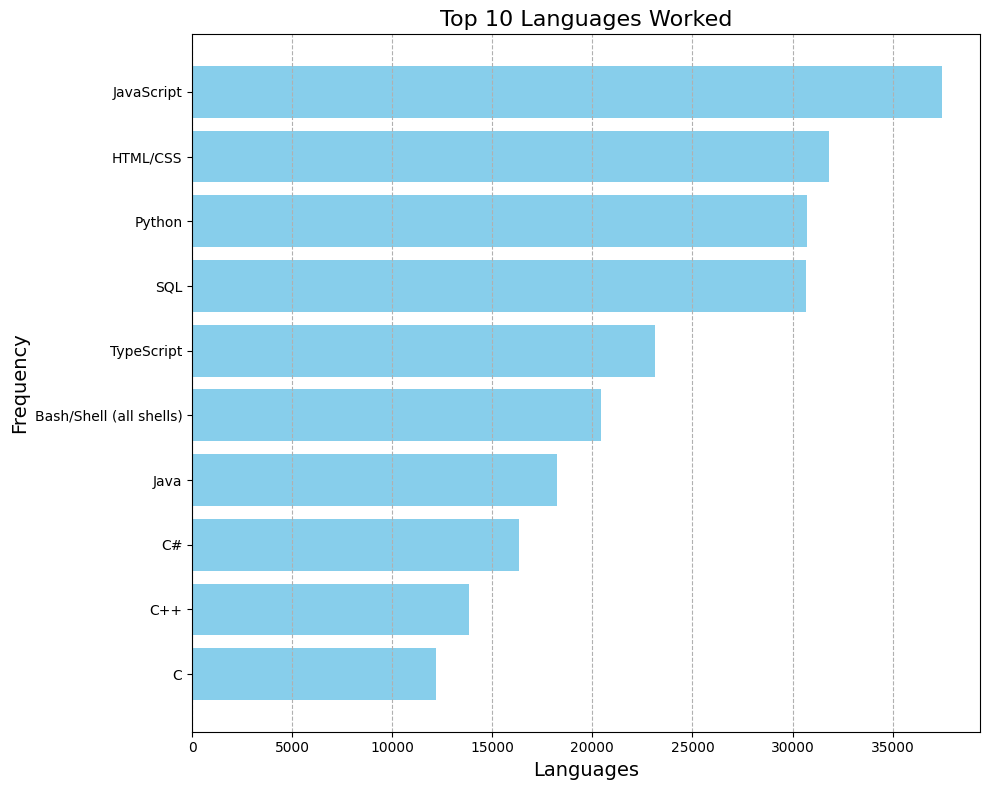

In [103]:
plt.figure(figsize=(10, 8))
platform_data = process_column('LanguageHaveWorkedWith')
platform_data = platform_data.sort_values(by='LanguageHaveWorkedWith_Total', ascending=False).head(10)

plt.barh(platform_data['LanguageHaveWorkedWith'], platform_data['LanguageHaveWorkedWith_Total'], color='skyblue')
plt.title('Top 10 Languages Worked', fontsize=16)
plt.xlabel('Languages', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()

- The top 10 programming languages for the next year 

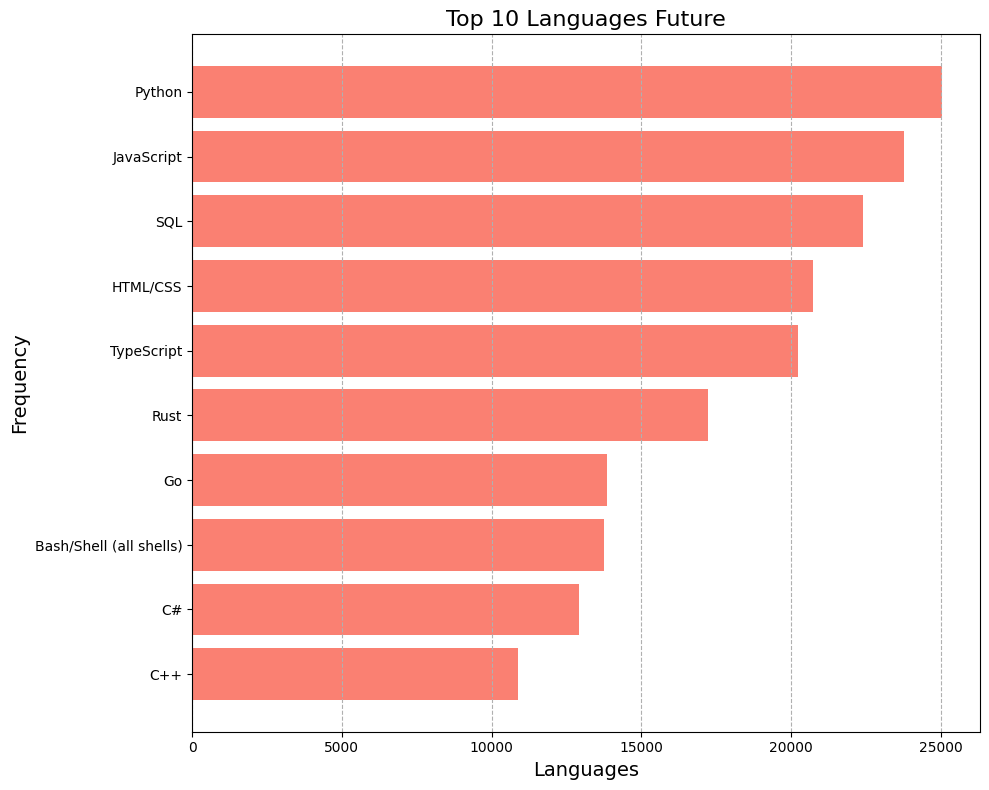

In [105]:
plt.figure(figsize=(10, 8))
platform_data = process_column('LanguageWantToWorkWith')
platform_data = platform_data.sort_values(by='LanguageWantToWorkWith_Total', ascending=False).head(10)

plt.barh(platform_data['LanguageWantToWorkWith'], platform_data['LanguageWantToWorkWith_Total'], color='salmon')
plt.title('Top 10 Languages Future', fontsize=16)
plt.xlabel('Languages', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()

***Databases Trends***

- The top 10 databases for the current year 

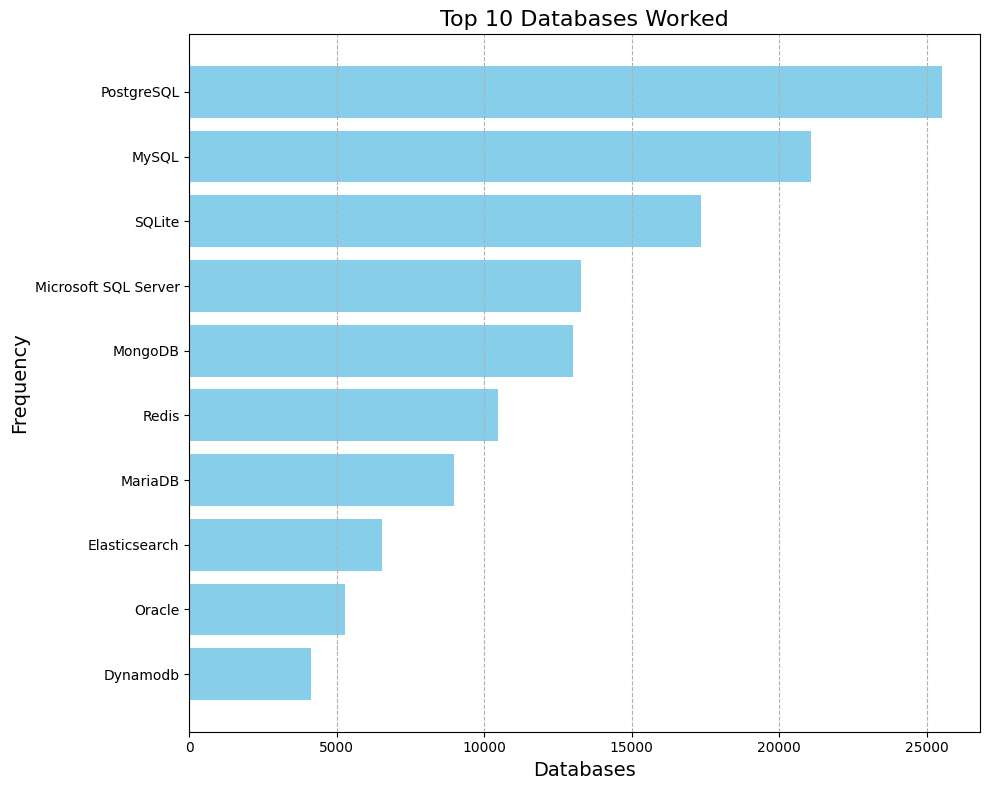

In [114]:
plt.figure(figsize=(10, 8))
platform_data = process_column('DatabaseHaveWorkedWith')
platform_data = platform_data.dropna()
platform_data['DatabaseHaveWorkedWith'] = platform_data['DatabaseHaveWorkedWith'].astype(str)
platform_data = platform_data.sort_values(by='DatabaseHaveWorkedWith_Total', ascending=False).head(10)
plt.barh(platform_data['DatabaseHaveWorkedWith'], platform_data['DatabaseHaveWorkedWith_Total'], color='skyblue')
plt.title('Top 10 Databases Worked', fontsize=16)
plt.xlabel('Databases', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()

- The top 10 databases for the next year 

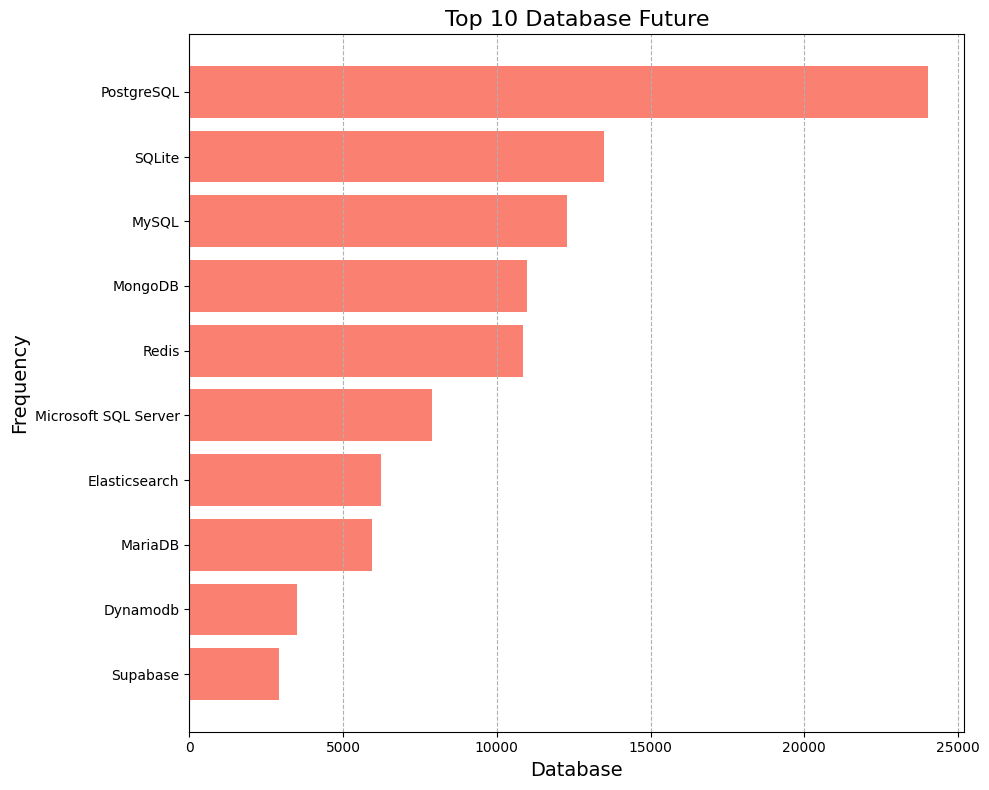

In [115]:
plt.figure(figsize=(10, 8))
platform_data = process_column('DatabaseWantToWorkWith')
platform_data = platform_data.dropna()
platform_data['DatabaseWantToWorkWith'] = platform_data['DatabaseWantToWorkWith'].astype(str)
platform_data = platform_data.sort_values(by='DatabaseWantToWorkWith_Total', ascending=False).head(10)

plt.barh(platform_data['DatabaseWantToWorkWith'], platform_data['DatabaseWantToWorkWith_Total'], color='salmon')
plt.title('Top 10 Database Future', fontsize=16)
plt.xlabel('Database', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()

#### Save the Cleaned and Analyzed Dataset

In [116]:
output_file_path = r"C:\Users\cubil\Downloads\Lab Data\data_dataset.csv"
df_clean.to_csv(output_file_path, index=False)

output_file_path

'C:\\Users\\cubil\\Downloads\\Lab Data\\data_dataset.csv'